In [2]:
import numpy as np
import matplotlib.pyplot as plt

## matplotlib API入门

In [4]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

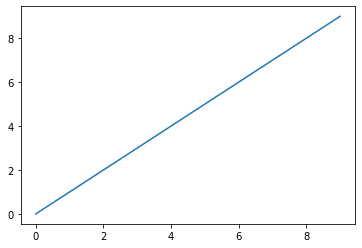

In [5]:
plt.plot(data)

### Figure和Subplot

matplotlib的图像都位于Figure对象中。你可以用`plt.figure`创建一个新的Figure：

> 提示：使用Jupyter notebook有一点不同，即每个小窗重新执行后，图形会被重置。
> 因此，对于复杂的图形，必须将所有的绘图命令存在一个小窗里。

In [7]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

不能通过空Figure绘图。必须用`add_subplot`创建一个或多个subplot才行：

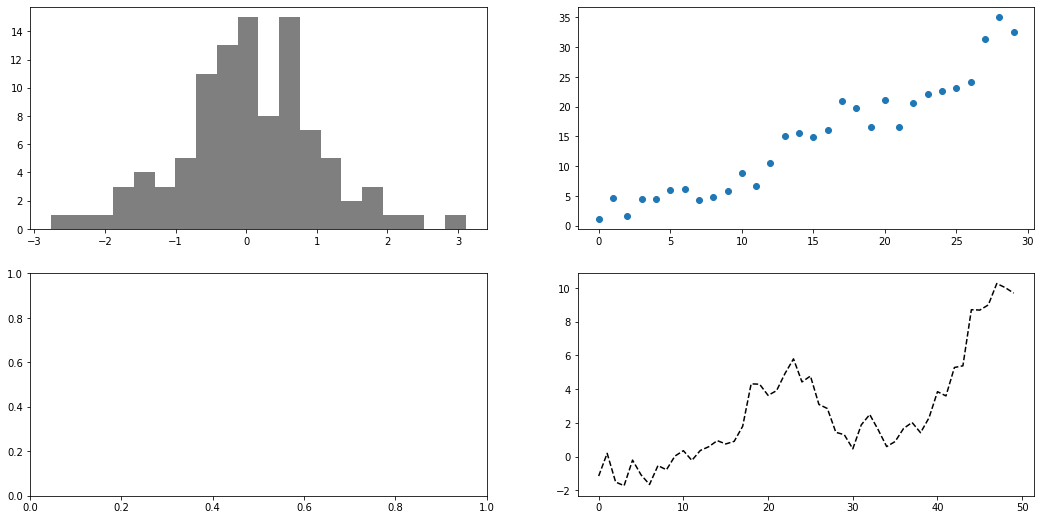

In [22]:
fig = plt.figure(figsize=(18, 9))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
plt.plot(np.random.randn(50).cumsum(), 'k--')

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.5)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

这段代码的意思是：图像应该是2×2的（即最多4张图），且当前选中的是4个subplot中的第一个（编号从1开始）。
如果再把后面两个subplot也创建出来，最终得到的图像如图所示：

"k--"是一个线型选项，用于告诉matplotlib绘制黑色虚线图。

创建包含subplot网格的figure是一个非常常见的任务，matplotlib有一个更为方便的方法plt.subplots，它可以创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组：

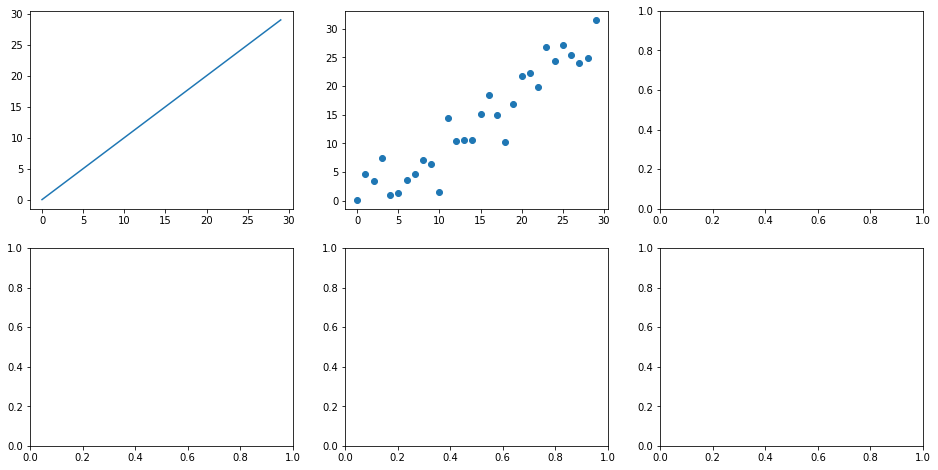

In [35]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

axes[0, 1].scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
axes[0, 0].plot(np.arange(30))
